In [ ]:
### Here we test how the methods performed if the distributions are not normal, which is partially a violation to our method

In [2]:
### Some initializations
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import itertools
import loli
from heapq import nlargest
from sklearn.cluster import KMeans

Sample size 1 of 5
Sample size 2 of 5
Sample size 3 of 5
Sample size 4 of 5
Sample size 5 of 5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


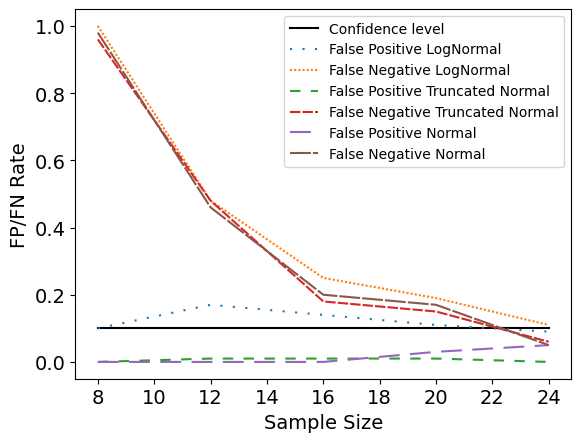

In [7]:
### We start by changing the target noise distribution. We make a gaussianity assumption to calibrate the method, i.e., 
# ensuring that the false positive rate is below alpha. Violations to the target noise should thus only affect this
# We chose a lognormal and truncated normal as comparison, as those have different tail properties.
np.random.seed(0)
d=6  #Dimensionality
supp=(1,2) #support indices
s=len(supp)  #Number of support entries
sample=[8,12,16,20,24]
fngauss=np.zeros((len(sample)))
fpgauss=np.zeros((len(sample)))
fnuni=np.zeros((len(sample)))
fpuni=np.zeros((len(sample)))
fnlogn=np.zeros((len(sample)))
fplogn=np.zeros((len(sample)))
runs=100
n=sample[-1] # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=5      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
Xgauss=[]
Ygauss=[]
Xuni=[]
Yuni=[]
Xlogn=[]
Ylogn=[]
Xgauss=[]
Ygauss=[]
for r in range(runs):
    betas=np.zeros((I,d))

    Xuni.append([])
    Yuni.append([])
    Xlogn.append([])
    Ylogn.append([])
    Xgauss.append([])
    Ygauss.append([])
    for o,n1 in enumerate(sample):

        Xuni[r].append([])
        Yuni[r].append([])
        Xlogn[r].append([])
        Ylogn[r].append([])
        Xgauss[r].append([])
        Ygauss[r].append([])
        for i in range(I):
            betas[i,supp]=np.random.uniform(low=1,high=5,size=(s))

            
            x=np.zeros((n,d))
            y=np.zeros((n))
            a=np.random.uniform(low=1,high=5,size=(d))
            for p in range(d):
                x[:,p]=np.random.normal(scale=a[p],size=(n))
            Xuni[r][o].append(x[:n1])
            Yuni[r][o].append(y[:n1])
            
            Xlogn[r][o].append(x[:n1])
            Ylogn[r][o].append(y[:n1])
            
            Xgauss[r][o].append(x[:n1])
            Ygauss[r][o].append(y[:n1])


for o,n1 in enumerate(sample):
    print('Sample size',o+1,'of',len(sample))
    for r in range(runs):
        
        for i in range(I):
            
            e=np.random.normal(scale=1,size=(n1))
            ind=np.where(e>1.5)
            e[ind]=1.5
            ind=np.where(e<-1.5)
            e[ind]=-1.5
            Yuni[r][o][i]=Xuni[r][o][i]@(betas[i,:])+e
            
            e=np.random.lognormal(0,1,size=(n1))
            Ylogn[r][o][i]=Xlogn[r][o][i]@(betas[i,:])+e
            
            e=np.random.normal(scale=1,size=(n1))
            Ygauss[r][o][i]=Xgauss[r][o][i]@(betas[i,:])+e


                
        plausibleS=loli.gauss(Xuni[r][o],Yuni[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fpuni[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fnuni[o]+=1/runs
        
        plausibleS=loli.gauss(Xlogn[r][o],Ylogn[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fplogn[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fnlogn[o]+=1/runs
                
        plausibleS=loli.gauss(Xgauss[r][o],Ygauss[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fpgauss[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fngauss[o]+=1/runs

fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black')
plt.plot(sample,fplogn,label='False Positive LogNormal',linestyle=(0, (1, 5)))
plt.plot(sample,fnlogn,label='False Negative LogNormal',linestyle=(0, (1, 1)))
plt.plot(sample,fpuni,label='False Positive Truncated Normal',linestyle=(0, (5, 5)))
plt.plot(sample,fnuni,label='False Negative Truncated Normal',linestyle=(0, (5, 1)))
plt.plot(sample,fpgauss,label='False Positive Normal',linestyle=(0, (10, 5)))
plt.plot(sample,fngauss,label='False Negative Normal',linestyle=(0, (10, 1)))

plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Figures/TargetnoiseviolationE='+str(I)+'.eps',bbox_inches="tight",format='eps')

Sample size 1 of 4
Sample size 2 of 4
Sample size 3 of 4
Sample size 4 of 4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


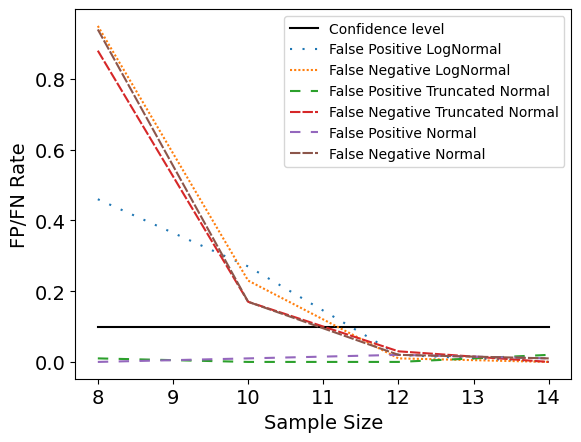

In [5]:
### The violations did not affect the method too much in the last run. Note though that we only have 5 environments. We 
# expect that the method is more affected if we have more environments
np.random.seed(0)
d=6  #Dimensionality
supp=(1,2) #support indices
s=len(supp)  #Number of support entries
sample=[8,10,12,14]
fngauss=np.zeros((len(sample)))
fpgauss=np.zeros((len(sample)))
fnuni=np.zeros((len(sample)))
fpuni=np.zeros((len(sample)))
fnlogn=np.zeros((len(sample)))
fplogn=np.zeros((len(sample)))
runs=100
n=sample[-1] # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=50      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
Xgauss=[]
Ygauss=[]
Xuni=[]
Yuni=[]
Xlogn=[]
Ylogn=[]
Xgauss=[]
Ygauss=[]
for r in range(runs):
    betas=np.zeros((I,d))

    Xuni.append([])
    Yuni.append([])
    Xlogn.append([])
    Ylogn.append([])
    Xgauss.append([])
    Ygauss.append([])
    for o,n1 in enumerate(sample):

        Xuni[r].append([])
        Yuni[r].append([])
        Xlogn[r].append([])
        Ylogn[r].append([])
        Xgauss[r].append([])
        Ygauss[r].append([])
        for i in range(I):
            betas[i,supp]=np.random.uniform(low=1,high=5,size=(s))

            
            x=np.zeros((n,d))
            y=np.zeros((n))
            a=np.random.uniform(low=1,high=5,size=(d))
            for p in range(d):
                x[:,p]=np.random.normal(scale=a[p],size=(n))
            Xuni[r][o].append(x[:n1])
            Yuni[r][o].append(y[:n1])
            
            Xlogn[r][o].append(x[:n1])
            Ylogn[r][o].append(y[:n1])
            
            Xgauss[r][o].append(x[:n1])
            Ygauss[r][o].append(y[:n1])


for o,n1 in enumerate(sample):
    print('Sample size',o+1,'of',len(sample))
    for r in range(runs):
        
        for i in range(I):
            
            e=np.random.normal(scale=1,size=(n1))
            ind=np.where(e>1.5)
            e[ind]=1.5
            ind=np.where(e<-1.5)
            e[ind]=-1.5
            Yuni[r][o][i]=Xuni[r][o][i]@(betas[i,:])+e
            
            e=np.random.lognormal(0,1,size=(n1))
            Ylogn[r][o][i]=Xlogn[r][o][i]@(betas[i,:])+e
            
            e=np.random.normal(scale=1,size=(n1))
            Ygauss[r][o][i]=Xgauss[r][o][i]@(betas[i,:])+e


                
        plausibleS=loli.gauss(Xuni[r][o],Yuni[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fpuni[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fnuni[o]+=1/runs
        
        plausibleS=loli.gauss(Xlogn[r][o],Ylogn[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fplogn[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fnlogn[o]+=1/runs
                
        plausibleS=loli.gauss(Xgauss[r][o],Ygauss[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fpgauss[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fngauss[o]+=1/runs

fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black')
plt.plot(sample,fplogn,label='False Positive LogNormal',linestyle=(0, (1, 5)))
plt.plot(sample,fnlogn,label='False Negative LogNormal',linestyle=(0, (1, 1)))
plt.plot(sample,fpuni,label='False Positive Truncated Normal',linestyle=(0, (5, 5)))
plt.plot(sample,fnuni,label='False Negative Truncated Normal',linestyle=(0, (5, 1)))
plt.plot(sample,fpgauss,label='False Positive Normal',linestyle=(0, (5, 5)))
plt.plot(sample,fngauss,label='False Negative Normal',linestyle=(0, (5, 1)))

plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Figures/TargetnoiseviolationE='+str(I)+'.eps',bbox_inches="tight",format='eps')

Sample size 1 of 5
Sample size 2 of 5
Sample size 3 of 5
Sample size 4 of 5
Sample size 5 of 5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


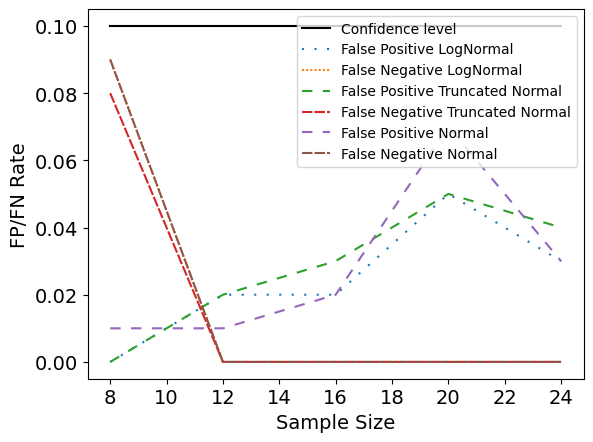

In [15]:
### Now we test what happens if the covariates are not normal, while the noise is. We expect that the power alone is 
# affected by that
np.random.seed(0)
d=6  #Dimensionality
supp=(1,2) #support indices
s=len(supp)  #Number of support entries
sample=[8,12,16,20,24]
fngauss=np.zeros((len(sample)))
fpgauss=np.zeros((len(sample)))
fnuni=np.zeros((len(sample)))
fpuni=np.zeros((len(sample)))
fnlogn=np.zeros((len(sample)))
fplogn=np.zeros((len(sample)))
runs=100
n=sample[-1] # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=5      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
Xgauss=[]
Ygauss=[]
Xuni=[]
Yuni=[]
Xlogn=[]
Ylogn=[]
Xgauss=[]
Ygauss=[]
for r in range(runs):
    betas=np.zeros((I,d))

    Xuni.append([])
    Yuni.append([])
    Xlogn.append([])
    Ylogn.append([])
    Xgauss.append([])
    Ygauss.append([])
    for o,n1 in enumerate(sample):

        Xuni[r].append([])
        Yuni[r].append([])
        Xlogn[r].append([])
        Ylogn[r].append([])
        Xgauss[r].append([])
        Ygauss[r].append([])
        for i in range(I):
            betas[i,supp]=np.random.uniform(low=1,high=5,size=(s))

            
            x=np.zeros((n,d))
            y=np.zeros((n))
            a=np.random.uniform(low=1,high=5,size=(d))
            for p in range(d):
                e=np.random.normal(scale=a[p],size=(1))
                ind=np.where(e>0.5)
                e[ind]=0.5
                ind=np.where(e<-0.5)
                e[ind]=-0.5
                x[:,p]=np.random.uniform(low=-10*a[p],high=10*a[p])
            Xuni[r][o].append(x[:n1])
            Yuni[r][o].append(y[:n1])
            for p in range(d):
                x[:,p]=np.random.normal(scale=a[p],size=(n))
            Xlogn[r][o].append(x[:n1])
            Ylogn[r][o].append(y[:n1])
            for p in range(d):
                x[:,p]=np.random.lognormal(0,a[p],size=(n))
            Xgauss[r][o].append(x[:n1])
            Ygauss[r][o].append(y[:n1])


for o,n1 in enumerate(sample):
    print('Sample size',o+1,'of',len(sample))
    for r in range(runs):
        
        for i in range(I):
            
            e=np.random.normal(scale=1,size=(n1))
            Yuni[r][o][i]=Xuni[r][o][i]@(betas[i,:])+e
            Ylogn[r][o][i]=Xlogn[r][o][i]@(betas[i,:])+e
            Ygauss[r][o][i]=Xgauss[r][o][i]@(betas[i,:])+e


                
        plausibleS=loli.gauss(Xuni[r][o],Yuni[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fpuni[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fnuni[o]+=1/runs
        
        plausibleS=loli.gauss(Xlogn[r][o],Ylogn[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fplogn[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fnlogn[o]+=1/runs
                
        plausibleS=loli.gauss(Xgauss[r][o],Ygauss[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fpgauss[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fngauss[o]+=1/runs

fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black')
plt.plot(sample,fplogn,label='False Positive LogNormal',linestyle=(0, (1, 5)))
plt.plot(sample,fnlogn,label='False Negative LogNormal',linestyle=(0, (1, 1)))
plt.plot(sample,fpuni,label='False Positive Truncated Normal',linestyle=(0, (5, 5)))
plt.plot(sample,fnuni,label='False Negative Truncated Normal',linestyle=(0, (5, 1)))
plt.plot(sample,fpgauss,label='False Positive Normal',linestyle=(0, (5, 5)))
plt.plot(sample,fngauss,label='False Negative Normal',linestyle=(0, (5, 1)))

plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Figures/CovariateviolationE='+str(I)+'.eps',bbox_inches="tight",format='eps')

Sample size 1 of 5
Sample size 2 of 5
Sample size 3 of 5
Sample size 4 of 5
Sample size 5 of 5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


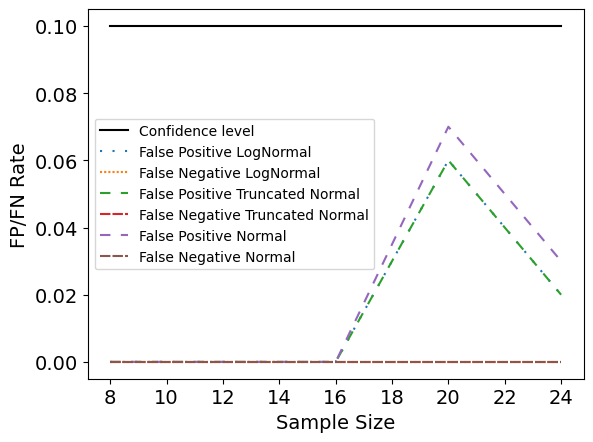

In [16]:
### Now we test what happens if the covariates are not normal, while the noise is. We expect that the power alone is 
# affected by that. Now with more environments, we expect a stronger behavior
np.random.seed(0)
d=6  #Dimensionality
supp=(1,2) #support indices
s=len(supp)  #Number of support entries
sample=[8,12,16,20,24]
fngauss=np.zeros((len(sample)))
fpgauss=np.zeros((len(sample)))
fnuni=np.zeros((len(sample)))
fpuni=np.zeros((len(sample)))
fnlogn=np.zeros((len(sample)))
fplogn=np.zeros((len(sample)))
runs=100
n=sample[-1] # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=50      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
Xgauss=[]
Ygauss=[]
Xuni=[]
Yuni=[]
Xlogn=[]
Ylogn=[]
Xgauss=[]
Ygauss=[]
for r in range(runs):
    betas=np.zeros((I,d))

    Xuni.append([])
    Yuni.append([])
    Xlogn.append([])
    Ylogn.append([])
    Xgauss.append([])
    Ygauss.append([])
    for o,n1 in enumerate(sample):

        Xuni[r].append([])
        Yuni[r].append([])
        Xlogn[r].append([])
        Ylogn[r].append([])
        Xgauss[r].append([])
        Ygauss[r].append([])
        for i in range(I):
            betas[i,supp]=np.random.uniform(low=1,high=5,size=(s))

            
            x=np.zeros((n,d))
            y=np.zeros((n))
            a=np.random.uniform(low=1,high=5,size=(d))
            for p in range(d):
                e=np.random.normal(scale=a[p],size=(1))
                ind=np.where(e>0.5)
                e[ind]=0.5
                ind=np.where(e<-0.5)
                e[ind]=-0.5
                x[:,p]=np.random.uniform(low=-a[p],high=a[p])
            Xuni[r][o].append(x[:n1])
            Yuni[r][o].append(y[:n1])
            for p in range(d):
                x[:,p]=np.random.normal(scale=a[p],size=(n))
            Xlogn[r][o].append(x[:n1])
            Ylogn[r][o].append(y[:n1])
            for p in range(d):
                x[:,p]=np.random.lognormal(0,a[p],size=(n))
            Xgauss[r][o].append(x[:n1])
            Ygauss[r][o].append(y[:n1])


for o,n1 in enumerate(sample):
    print('Sample size',o+1,'of',len(sample))
    for r in range(runs):
        
        for i in range(I):
            
            e=np.random.normal(scale=1,size=(n1))
            Yuni[r][o][i]=Xuni[r][o][i]@(betas[i,:])+e
            Ylogn[r][o][i]=Xlogn[r][o][i]@(betas[i,:])+e
            Ygauss[r][o][i]=Xgauss[r][o][i]@(betas[i,:])+e


                
        plausibleS=loli.gauss(Xuni[r][o],Yuni[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fpuni[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fnuni[o]+=1/runs
        
        plausibleS=loli.gauss(Xlogn[r][o],Ylogn[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fplogn[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fnlogn[o]+=1/runs
                
        plausibleS=loli.gauss(Xgauss[r][o],Ygauss[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fpgauss[o]+=1/runs
            if len(set(supp).difference(supphat))>0:
                fngauss[o]+=1/runs

fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black')
plt.plot(sample,fplogn,label='False Positive LogNormal',linestyle=(0, (1, 5)))
plt.plot(sample,fnlogn,label='False Negative LogNormal',linestyle=(0, (1, 1)))
plt.plot(sample,fpuni,label='False Positive Truncated Normal',linestyle=(0, (5, 5)))
plt.plot(sample,fnuni,label='False Negative Truncated Normal',linestyle=(0, (5, 1)))
plt.plot(sample,fpgauss,label='False Positive Normal',linestyle=(0, (5, 5)))
plt.plot(sample,fngauss,label='False Negative Normal',linestyle=(0, (5, 1)))

plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Figures/CovariateviolationE='+str(I)+'.eps',bbox_inches="tight",format='eps')